## 4.4 Overfitting and Underfitting
last modified : 2021-3-29 by Imryoung Jeong

> <i>Optimization</i> refers to the process of adjusting a model to get the best performance possible on the training data, whereas <i>generalization</i> refers to how well the trained model performs on data it has never seen before. <br>
At the beginning, optimization and generalization are correlated: the lower the loss on training data, the lower the loss on test data. While this is happening, your model is said to be <i>underfit</i>. ... But after a certain number of iterations on the training data, ... the model is starting to <i>overfit</i>. That is, it's beginning to learn patterns that are <b>specific to the training data but that are misleading or irrelevant when it comes to new data.</b>

> ...If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance to generalizing well. The processing of fighting overfitting this way is called <b><i>regularization</i></b>.

#### 4.4.1 Reducing the network's size

<ul>
    <li> the model's <i><b>capacity</b></i> : the number of learnable params in a model</li>
    <li> more memorization capacity can learn a direct mapping between training samples and their targets, without any generalization power</li>
    <li> if the network has limited memorization resources, in order to minimize its loss, it will have to resort to learning compressed representations that have predictive power regarding the targets</li><br>
    <li> basically, thers is a trade-off between too much capacity and not enough capacity
        <ul>
            <li> higher capacity would be good at fitting, but not at generalization, thus lead to overfitting</li>
            <li> lower capacity would be goot at generalization, but not at fitting, thus lead to underfitting</li></ul>
        </ul>

In [4]:
import numpy as np
import keras

from keras import models
from keras import layers

from keras.datasets import imdb

In [7]:
import matplotlib.pyplot as plt

In [5]:
def vectorize_sequences(sequences, dimension = 10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1
    return results

In [6]:
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words = 10000)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or 

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

###### Original model
---

In [10]:
model_original = models.Sequential()

model_original.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model_original.add(layers.Dense(16, activation = 'relu'))
model_original.add(layers.Dense(1, activation = 'sigmoid'))

model_original.compile(optimizer = 'rmsprop',
                       loss = 'binary_crossentropy',
                       metrics = ['accuracy'])

In [11]:
history_original = model_original.fit(partial_x_train,
                                      partial_y_train,
                                      epochs = 20,
                                      batch_size = 512,
                                      validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.6289 - accuracy: 0.6322 - val_loss: 0.4432 - val_accuracy: 0.8705
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3781 - accuracy: 0.8891 - val_loss: 0.3430 - val_accuracy: 0.8766
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2598 - accuracy: 0.9262 - val_loss: 0.2885 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1965 - accuracy: 0.9422 - val_loss: 0.2751 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1576 - accuracy: 0.9509 - val_loss: 0.2757 - val_accuracy: 0.8904
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1244 - accuracy: 0.9651 - val_loss: 0.2864 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1013 - accuracy: 0.9723 - val_loss: 0.3011 - val_accuracy: 0.8863
Epoch 8/20
30

###### Model with lower capacity
---

In [12]:
model_lower = models.Sequential()

model_lower.add(layers.Dense(4, activation = 'relu', input_shape = (10000,)))
model_lower.add(layers.Dense(4, activation = 'relu'))
model_lower.add(layers.Dense(1, activation = 'sigmoid'))

model_lower.compile(optimizer = 'rmsprop',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

In [13]:
history_lower = model_lower.fit(partial_x_train,
                                partial_y_train,
                                epochs = 20,
                                batch_size = 512,
                                validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6691 - accuracy: 0.5761 - val_loss: 0.6124 - val_accuracy: 0.7152
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5844 - accuracy: 0.7248 - val_loss: 0.5542 - val_accuracy: 0.7574
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5275 - accuracy: 0.8072 - val_loss: 0.5310 - val_accuracy: 0.7471
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4844 - accuracy: 0.8534 - val_loss: 0.4975 - val_accuracy: 0.8297
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4562 - accuracy: 0.8862 - val_loss: 0.4800 - val_accuracy: 0.8611
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4341 - accuracy: 0.9082 - val_loss: 0.4728 - val_accuracy: 0.8423
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4046 - accuracy: 0.9193 - val_loss: 0.4577 - val_accuracy: 0.8746
Epoch 8/20
30

###### Model with higher capacity
---

In [16]:
model_higher = models.Sequential()

model_higher.add(layers.Dense(512, activation = 'relu', input_shape = (10000,)))
model_higher.add(layers.Dense(512, activation = 'relu'))
model_higher.add(layers.Dense(1, activation = 'sigmoid'))

model_higher.compile(optimizer = 'rmsprop',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

In [17]:
history_higher = model_higher.fit(partial_x_train,
                                partial_y_train,
                                epochs = 20,
                                batch_size = 512,
                                validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 88ms/step - loss: 0.6647 - accuracy: 0.6975 - val_loss: 0.2898 - val_accuracy: 0.8854
Epoch 2/20
30/30 [==============================] - 3s 87ms/step - loss: 0.2589 - accuracy: 0.9004 - val_loss: 0.2805 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 2s 82ms/step - loss: 0.1495 - accuracy: 0.9421 - val_loss: 0.3616 - val_accuracy: 0.8654
Epoch 4/20
30/30 [==============================] - 2s 79ms/step - loss: 0.0941 - accuracy: 0.9741 - val_loss: 0.3445 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 2s 81ms/step - loss: 0.0114 - accuracy: 0.9974 - val_loss: 0.5213 - val_accuracy: 0.8777
Epoch 6/20
30/30 [==============================] - 2s 80ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.6983 - val_accuracy: 0.8711
Epoch 7/20
30/30 [==============================] - 2s 76ms/step - loss: 2.1111e-04 - accuracy: 1.0000 - val_loss: 0.7076 - val_accuracy: 0.8883
Epoch 8/2

###### Compare three models
---

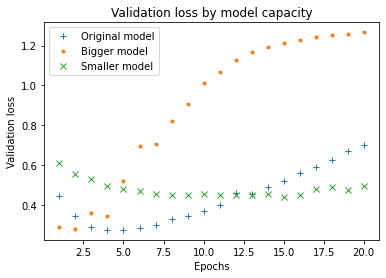

In [36]:
history_dict_original = history_original.history
history_dict_lower = history_lower.history
history_dict_higher = history_higher.history

val_loss_original = history_dict_original['val_loss']
val_loss_lower = history_dict_lower['val_loss']
val_loss_higher = history_dict_higher['val_loss']

epochs = range(1, len(val_loss_original) +1)

plt.plot(epochs, val_loss_original, '+', label = 'Original model')
plt.plot(epochs, val_loss_higher, '.', label = 'Bigger model')
plt.plot(epochs, val_loss_lower, 'x', label = 'Smaller model')

plt.title('Validation loss by model capacity')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

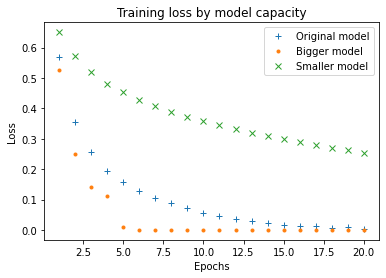

In [23]:
loss_values_original = history_dict_original['loss']
loss_values_lower = history_dict_lower['loss']
loss_values_higher = history_dict_higher['loss']

plt.plot(epochs, loss_values_original, '+', label = 'Original model')
plt.plot(epochs, loss_values_higher, '.', label = 'Bigger model')
plt.plot(epochs, loss_values_lower, 'x', label = 'Smaller model')

plt.title('Training loss by model capacity')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### 4.4.2 Adding weight regularization

<ul>
    <li>Simpler models are less likely to overfit than complex ones, where <i>simple model</i> here is a model where the distribution of param values has less entropy</li>
    <li>How ? ... by forcing its weights to take only small values, which makes the distribution of weight values more regular</li>
    <li><b>Weight regularization</b>: adding to the loss function of the network a cost associated with having large weights</li>
    </ul>

###### Adding L2 weight regularization to the model
---

In [24]:
from keras import regularizers

In [29]:
model_L2 = models.Sequential()

model_L2.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001),
                      activation = 'relu', input_shape = (10000,)))
model_L2.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001),
                      activation = 'relu'))
model_L2.add(layers.Dense(1, activation = 'sigmoid'))

<ul>
    <li><code>l2(0.001)</code> means every coefficient in the weight matrix of the layer will
        add <code>0.001 * weight_coefficient_value</code> to the total loss of the network.</li>
    <li>the penalty is only added at training time, so the loss for the network will be higher at training than at test time</li>
    </ul>

In [31]:
model_L2.compile(optimizer = 'rmsprop',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

history_L2 = model_L2.fit(partial_x_train,
                                partial_y_train,
                                epochs = 20,
                                batch_size = 512,
                                validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 28ms/step - loss: 0.6228 - accuracy: 0.7191 - val_loss: 0.4231 - val_accuracy: 0.8696
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3681 - accuracy: 0.8991 - val_loss: 0.3655 - val_accuracy: 0.8754
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2848 - accuracy: 0.9248 - val_loss: 0.3874 - val_accuracy: 0.8625
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2589 - accuracy: 0.9305 - val_loss: 0.3835 - val_accuracy: 0.8654
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2301 - accuracy: 0.9443 - val_loss: 0.3602 - val_accuracy: 0.8745
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2150 - accuracy: 0.9478 - val_loss: 0.3900 - val_accuracy: 0.8705
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1990 - accuracy: 0.9567 - val_loss: 0.3472 - val_accuracy: 0.8847
Epoch 8/20
30

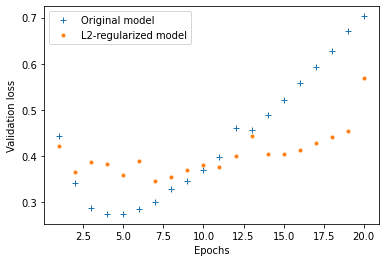

In [32]:
history_dict_L2 = history_L2.history
val_loss_L2 = history_dict_L2['val_loss']

plt.plot(epochs, val_loss_original, '+', label = 'Original model')
plt.plot(epochs, val_loss_L2, '.', label = 'L2-regularized model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

#### 4.4.3 Adding dropout

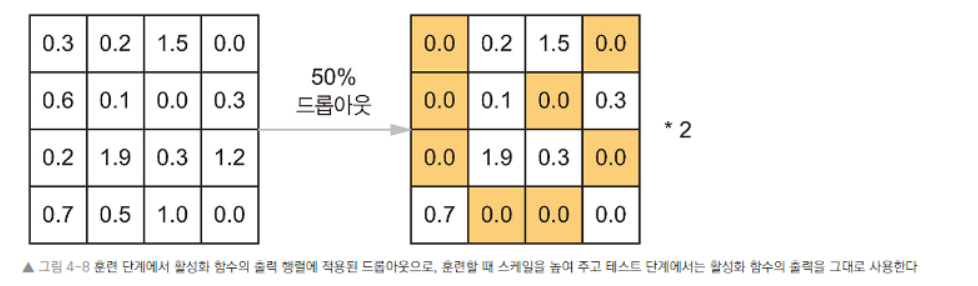

###### Adding dropout to the IMDB network
---

In [33]:
model_dropout = models.Sequential()

model_dropout.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(16, activation = 'relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(1, activation = 'sigmoid'))

model_dropout.compile(optimizer = 'rmsprop',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])

history_dropout = model_dropout.fit(partial_x_train,
                                    partial_y_train,
                                    epochs = 20,
                                    batch_size = 512,
                                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6507 - accuracy: 0.6040 - val_loss: 0.4830 - val_accuracy: 0.8579
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4966 - accuracy: 0.7750 - val_loss: 0.3874 - val_accuracy: 0.8634
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4021 - accuracy: 0.8415 - val_loss: 0.3372 - val_accuracy: 0.8714
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3451 - accuracy: 0.8782 - val_loss: 0.2905 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2944 - accuracy: 0.8958 - val_loss: 0.2764 - val_accuracy: 0.8912
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2592 - accuracy: 0.9126 - val_loss: 0.2731 - val_accuracy: 0.8893
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2309 - accuracy: 0.9211 - val_loss: 0.2773 - val_accuracy: 0.8885
Epoch 8/20
30

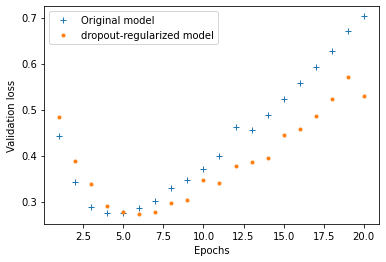

In [34]:
history_dict_dropout = history_dropout.history
val_loss_dropout = history_dict_dropout['val_loss']

plt.plot(epochs, val_loss_original, '+', label = 'Original model')
plt.plot(epochs, val_loss_dropout, '.', label = 'dropout-regularized model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()